In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install --upgrade tables

In [3]:
import pandas as pd
import numpy as np

np.random.seed(0)

import matplotlib.pyplot as plt
import seaborn as sns

import sys
import re

%matplotlib inline

In [4]:
train = pd.read_hdf('/content/drive/MyDrive/ML/PML8_course/input/train.v4.h5')
test = pd.read_hdf('/content/drive/MyDrive/ML/PML8_course/input/test.v4.h5') # test set without price

df_all = pd.concat([train, test], sort=False)

pd.set_option('display.max_columns',35)
pd.set_option('display.max_rows',50)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45694 entries, 0 to 45693
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   breadcrumbs                 45694 non-null  object 
 1   date                        45694 non-null  object 
 2   geo_block                   45694 non-null  object 
 3   owner                       45694 non-null  object 
 4   price                       45694 non-null  float64
 5   Security:                   26186 non-null  object 
 6   Building type:              45520 non-null  object 
 7   Object type:                45686 non-null  object 
 8   Ad type:                    45686 non-null  object 
 9   Commission agent:           45371 non-null  object 
 10  Construction phase:         35768 non-null  object 
 11  Housing class:              35768 non-null  object 
 12  Elevator:                   26821 non-null  object 
 13  Bathroom type:              123

In [ ]:
train.head()

,breadcrumbs,date,geo_block,owner,price,Security:,Building type:,Object type:,Ad type:,Commission agent:,Construction phase:,Housing class:,Elevator:,Bathroom type:,Balcony type:,Mortgage possible:,The view from the window:,Garbage chute:,Repair:,Fridge:,Phone:,Furniture:,Free layout:,It is possible to bargain:,Floor covering:,Room type:,Internet:,Kitchen furniture:,TV:,Washing machine:,Foundation type:,Overlap type:,Type of the building:,Playground:,Class:
0,"[Москва, МЦК Лужники]","[23 февраля 2018, 133, (+2 за сегодня), Обновл...","[г. Москва, г. Москва]",[],380.610000,"secure Parking, video surveillance, 24-hour se...",Brick,apartments,new building,no fee,Commissioned,Elite class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[Москва, Новая Москва, п. Сосенское, п. Коммун...","[сегодня в 04:52, 3, (+3 за сегодня)]","[Новая Москва, п. Сосенское, п. Коммунарка, Юж...",[],8.004631,Yes,Monolithic-brick,flat,from the developer,no fee,Building walls,Comfort class,yes,separate,balcony,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[Москва, МЦК Крымская, ул. Поляны]","[5 марта, 6, (+1 за сегодня), Обновлено 15 мая]","[г. Москва, ул Поляны, г. Москва, ул Поляны]",[],6.520000,provided,Monolithic,apartments,from the developer,no fee,Finish,Comfort class,yes,combined,NaN,NaN,yard,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[Москва, Беговой, м. Динамо, МЦК Хорошёво]","[22 мая 2018, 60, (+2 за сегодня), Обновлено 1...","[г. Москва, Беговой, г. Москва, Беговой]",[],20.269686,NaN,Monolithic,flat,new building,no fee,NaN,NaN,yes,NaN,loggia,yes,street,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[Москва, Филёвский Парк, м. Фили, МЦК Шелепиха]","[26 декабря 2018, 13, (+1 за сегодня), Обновле...","[г. Москва, Филёвский Парк, г. Москва, Филёвск...",[],15.100880,NaN,Monolithic,apartments,secondary,no fee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

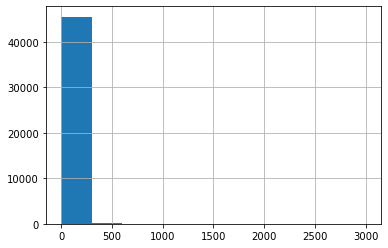

In [ ]:
train['price'].hist()

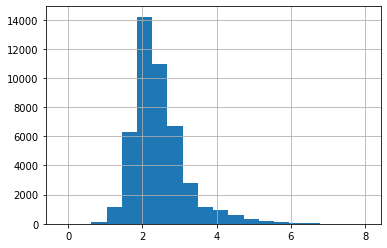

In [5]:
train['price_log'] = np.log(train['price'])
train['price_log'].hist(bins=20);

In [ ]:
train.isna().sum()

breadcrumbs                       0
date                              0
geo_block                         0
owner                             0
price                             0
Security:                     19508
Building type:                  174
Object type:                      8
Ad type:                          8
Commission agent:               323
Construction phase:            9926
Housing class:                 9926
Elevator:                     18873
Bathroom type:                33359
Balcony type:                 34463
Mortgage possible:            26593
The view from the window:     30936
Garbage chute:                26379
Repair:                       39586
Fridge:                       45370
Phone:                        45014
Furniture:                    45368
Free layout:                  44823
It is possible to bargain:    45386
Floor covering:               45156
Room type:                    44999
Internet:                     44855
Kitchen furniture:          

In [ ]:
test.isna().sum()

breadcrumbs                       0
date                              0
geo_block                         0
owner                             0
Security:                      9737
Building type:                   81
Object type:                      4
Ad type:                          4
Commission agent:               162
Construction phase:            4953
Housing class:                 4953
Elevator:                      9452
Bathroom type:                16579
Balcony type:                 17162
Mortgage possible:            13231
The view from the window:     15280
Garbage chute:                13048
Repair:                       19653
Fridge:                       22498
Phone:                        22276
Furniture:                    22471
Free layout:                  22243
It is possible to bargain:    22505
Floor covering:               22357
Room type:                    22319
Internet:                     22238
Kitchen furniture:            22550
TV:                         

In [ ]:
train.describe(include=['bool', 'object'])

,breadcrumbs,date,geo_block,owner,Security:,Building type:,Object type:,Ad type:,Commission agent:,Construction phase:,Housing class:,Elevator:,Bathroom type:,Balcony type:,Mortgage possible:,The view from the window:,Garbage chute:,Repair:,Fridge:,Phone:,Furniture:,Free layout:,It is possible to bargain:,Floor covering:,Room type:,Internet:,Kitchen furniture:,TV:,Washing machine:,Foundation type:,Overlap type:,Type of the building:,Playground:,Class:
count,45694,45694,45694,45694,26186,45520,45686,45686,45371,35768,35768,26821,12335,11231,19101,14758,19315,6108,324,680,326,871,308,538,695,839,216,155,91,303,351,354,196,80
unique,1712,13431,1116,265,109,9,4,3,1,7,4,1,3,5,1,2,1,6,1,1,1,1,1,4,3,1,1,1,1,6,4,2,1,1
top,"[Москва, Новая Москва, п. Сосенское, п. Коммун...","[16 мая, 2, (+1 за сегодня)]","[г. Москва, г. Москва]",[],provided,Monolithic,apartments,from the developer,no fee,Building walls,Comfort class,yes,separate,balcony,yes,street,yes,euro,yes,yes,yes,yes,yes,laminate,separate,yes,yes,yes,yes,Ribbon,Reinforced Concrete,Apartment building,yes,elite real estate
freq,1574,732,12243,41028,17188,32000,24698,21340,45371,13760,18592,26821,6384,6063,19101,7465,19315,5696,324,680,326,871,308,348,603,839,216,155,91,180,339,347,196,80


In [ ]:
df_all.describe(include=['bool', 'object'])

,breadcrumbs,date,geo_block,owner,Security:,Building type:,Object type:,Ad type:,Commission agent:,Construction phase:,Housing class:,Elevator:,Bathroom type:,Balcony type:,Mortgage possible:,The view from the window:,Garbage chute:,Repair:,Fridge:,Phone:,Furniture:,Free layout:,It is possible to bargain:,Floor covering:,Room type:,Internet:,Kitchen furniture:,TV:,Washing machine:,Foundation type:,Overlap type:,Type of the building:,Playground:,Class:
count,68361,68361,68361,68361,39116,68106,68349,68349,67876,53482,53482,40036,18423,16736,28537,22145,28934,9122,493,1071,522,1295,470,848,1043,1268,333,252,140,488,561,567,320,127
unique,2115,17452,1399,316,121,9,4,3,1,7,4,1,3,5,1,2,1,6,1,1,1,1,1,4,3,1,1,1,1,6,4,3,1,1
top,"[Москва, Новая Москва, п. Сосенское, п. Коммун...","[16 мая, 2, (+1 за сегодня)]","[г. Москва, г. Москва]",[],provided,Monolithic,apartments,from the developer,no fee,Building walls,Comfort class,yes,separate,balcony,yes,street,yes,euro,yes,yes,yes,yes,yes,laminate,separate,yes,yes,yes,yes,Ribbon,Reinforced Concrete,Apartment building,yes,elite real estate
freq,2353,1070,18353,61374,25703,47738,36975,31965,67876,20603,27835,40036,9498,9058,28537,11240,28934,8513,493,1071,522,1295,470,533,908,1268,333,252,140,283,542,551,320,127


In [ ]:
train.describe(percentiles=[0.25, 0.5, 0.75, 0.85, 0.9, 0.95])

,price,price_log
count,45694.000000,45694.000000
mean,17.422577,2.436431
std,38.332439,0.723210
min,0.820018,-0.198429
25%,7.173917,1.970452
50%,9.910000,2.293544
75%,15.405717,2.734739
85%,20.700000,3.030134
90%,26.500000,3.277145
95%,48.000000,3.871201


In [6]:
train.fillna('nan', inplace=True)

In [7]:
med = np.median(train['price_log'])
med_up = med + np.std(train['price_log'])
med_down = med - np.std(train['price_log'])
reference = [med_down, med, med_up]

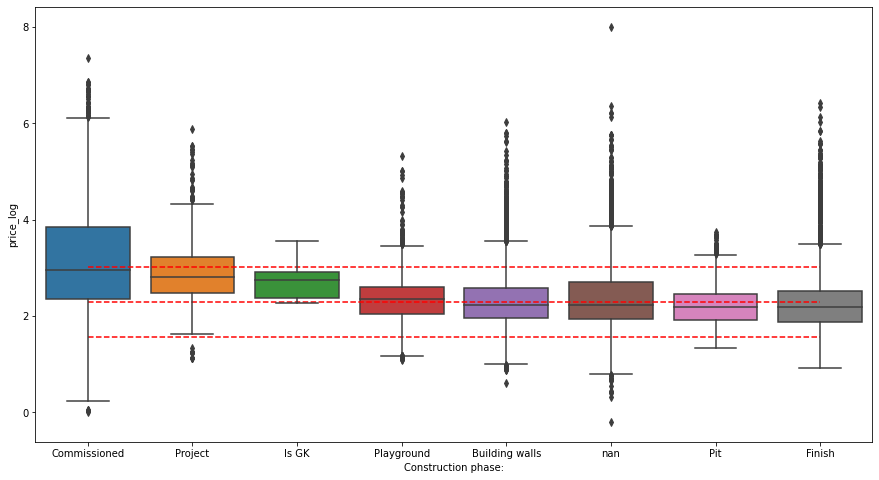

In [8]:
plt.figure(figsize=(15,8))
column = 'Construction phase:'
order_median = train.groupby([column])['price'].median().sort_values(ascending=False).index
order_size = train.groupby([column]).size().sort_values(ascending=False).index
plt.hlines(reference, 0, len(train[column].value_counts())-1, colors='r', linestyles='--')
sns.boxplot(x=column, y='price_log', data=train, order=order_median);

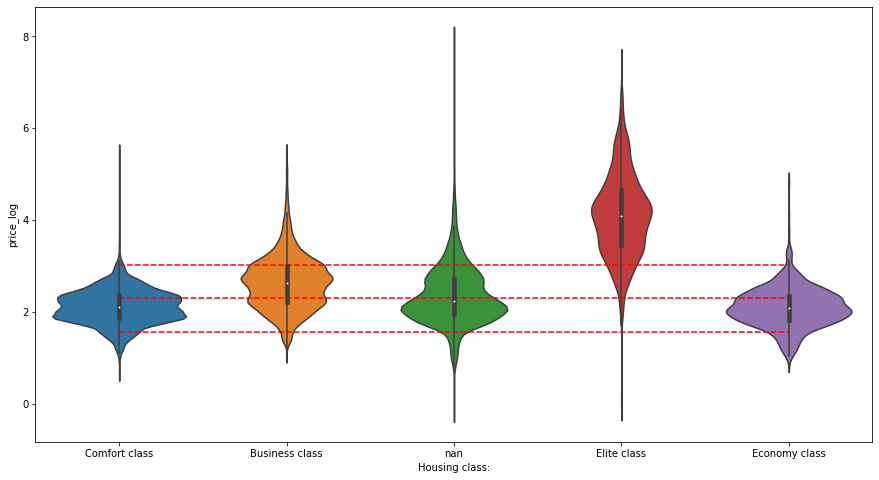

In [ ]:
plt.figure(figsize=(15,8))
column = 'Housing class:'
order_median = train.groupby([column])['price'].median().sort_values(ascending=False).index
order_size = train.groupby([column]).size().sort_values(ascending=False).index
plt.hlines(reference, 0, len(train[column].value_counts())-1, colors='r', linestyles='--')
sns.violinplot(x=column, y='price_log', data=train, order=order_size);

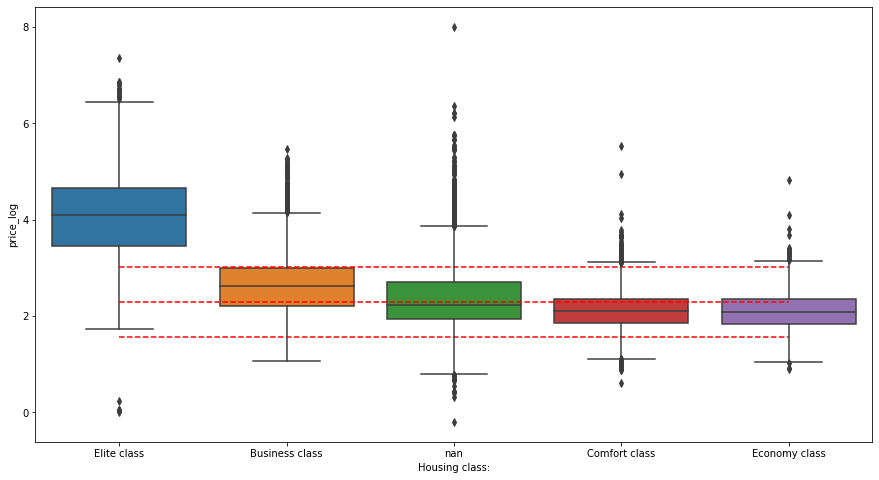

In [ ]:
plt.figure(figsize=(15,8))
plt.hlines(reference, 0, len(train[column].value_counts())-1, colors='r', linestyles='--')
sns.boxplot(x=column, y='price_log', data=train, order=order_median);

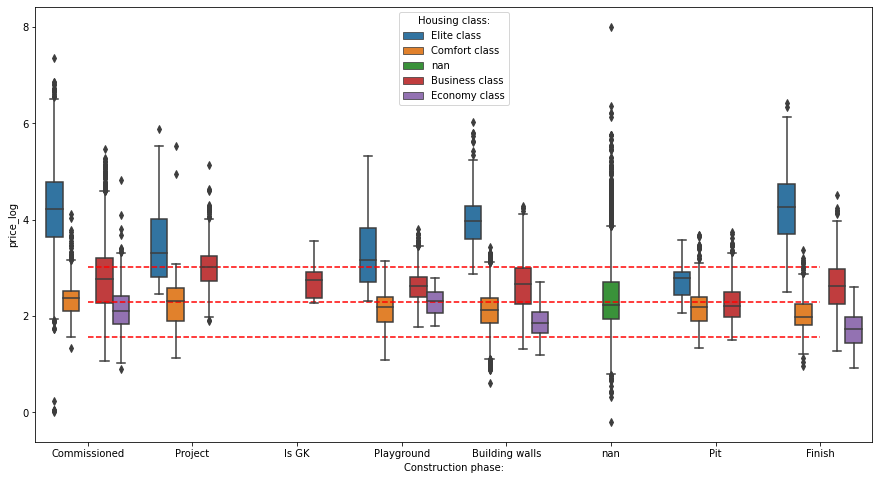

In [ ]:
plt.figure(figsize=(15,8))
column = 'Construction phase:'
order_median = train.groupby([column])['price'].median().sort_values(ascending=False).index
plt.hlines(reference, 0, len(train[column].value_counts())-1, colors='r', linestyles='--')
sns.boxplot(x=column, y='price_log', hue='Housing class:', data=train, order=order_median);

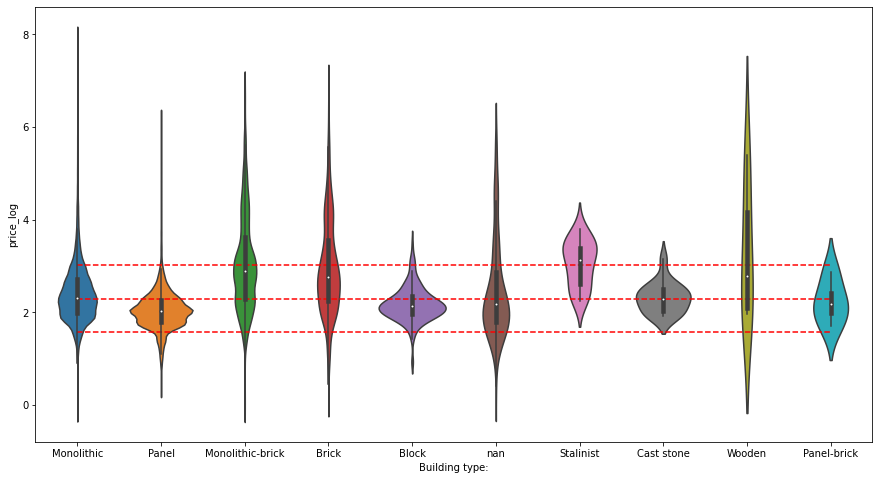

In [ ]:
plt.figure(figsize=(15,8))
column = 'Building type:'
order_median = train.groupby([column])['price'].median().sort_values(ascending=False).index
order_size = train.groupby([column]).size().sort_values(ascending=False).index
plt.hlines(reference, 0, len(train[column].value_counts())-1, colors='r', linestyles='--')
sns.violinplot(x=column, y='price_log', data=train, order=order_size);

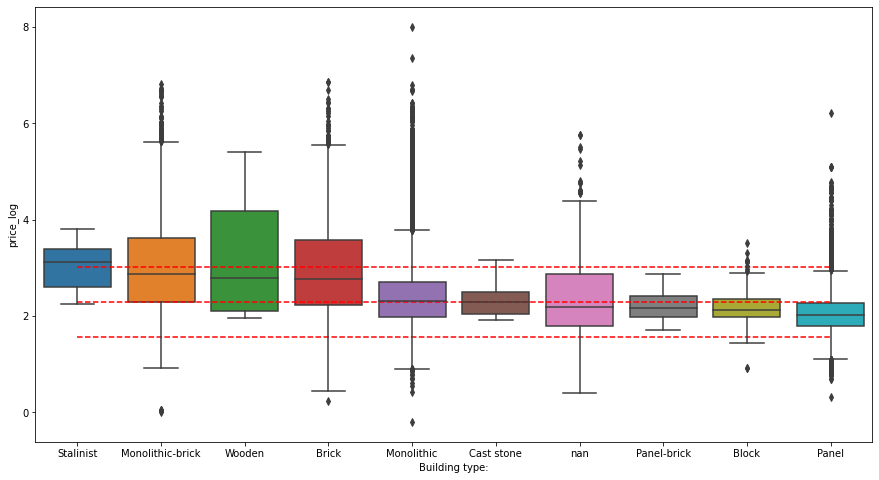

In [ ]:
plt.figure(figsize=(15,8))
plt.hlines(reference, 0, len(train[column].value_counts())-1, colors='r', linestyles='--')
sns.boxplot(x=column, y='price_log', data=train, order=order_median);

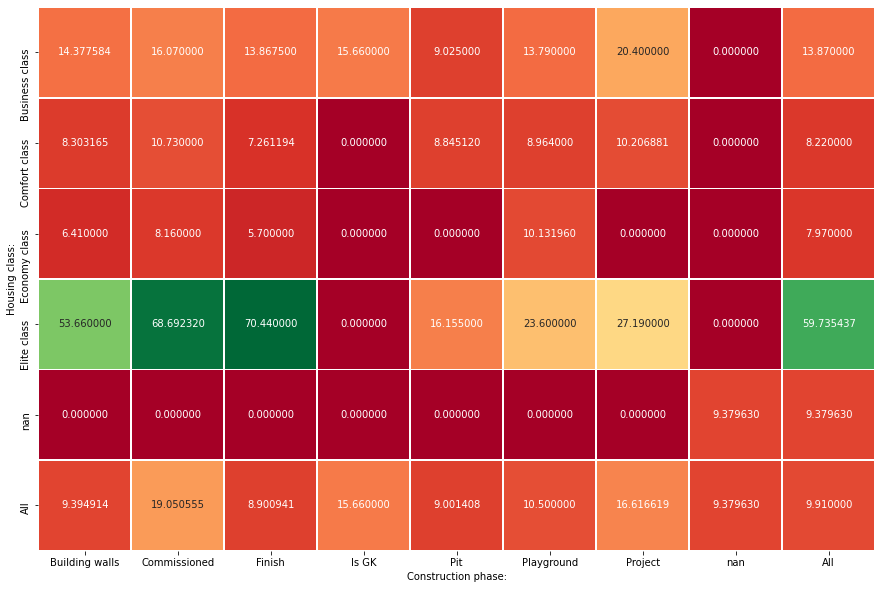

In [10]:
pt= train.pivot_table(values='price', index='Housing class:',columns='Construction phase:', aggfunc=np.median, fill_value=0, margins=True)
plt.rcParams['figure.figsize']=(15,10)
sns.heatmap(pt, annot=True, fmt="f", cmap="RdYlGn", cbar=False, linewidths=.5);

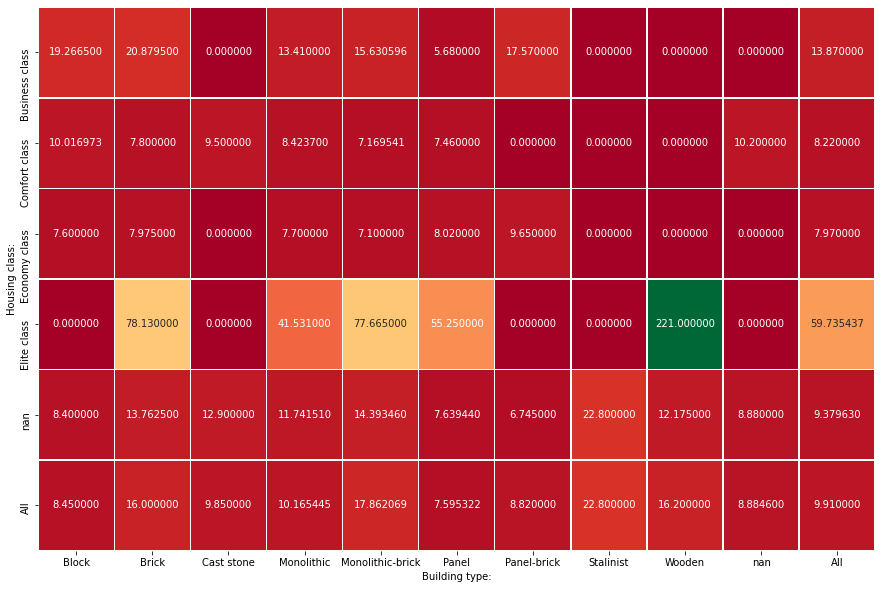

In [11]:
pt= train.pivot_table(values='price', index='Housing class:',columns='Building type:', aggfunc=np.median, fill_value=0, margins=True)
plt.rcParams['figure.figsize']=(15,10)
sns.heatmap(pt, annot=True, fmt="f", cmap="RdYlGn", cbar=False, linewidths=.5);

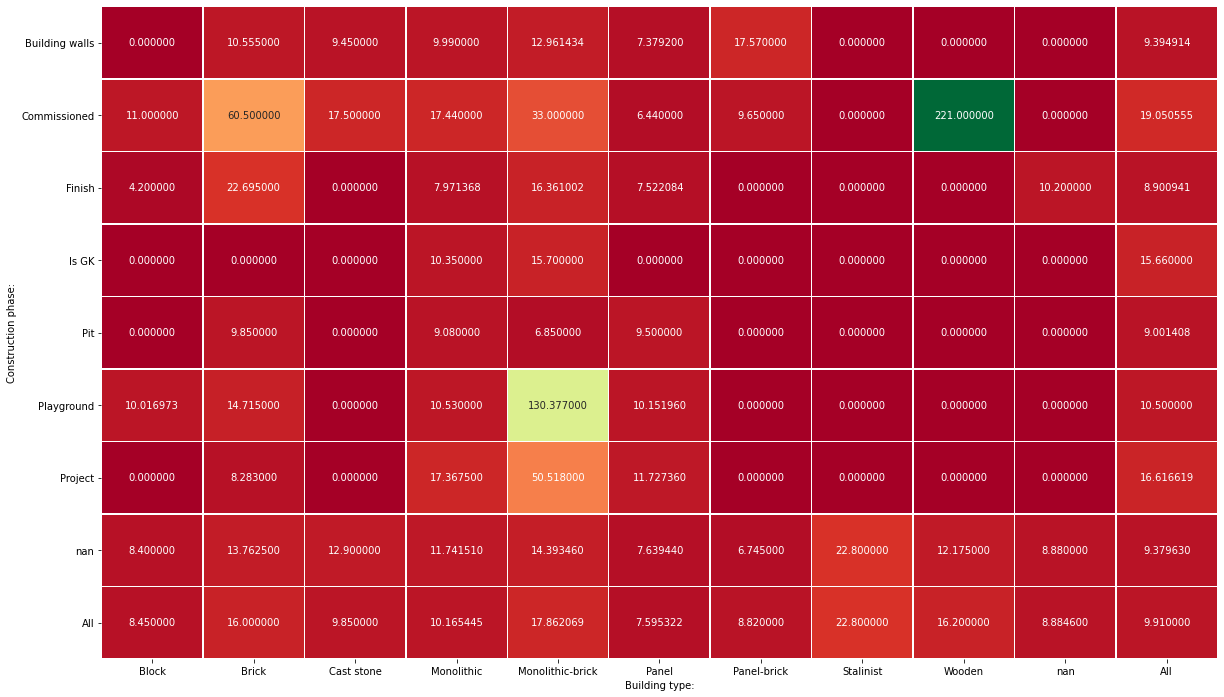

In [12]:
pt= train.pivot_table(values='price', index='Construction phase:',columns='Building type:', aggfunc=np.median, fill_value=0, margins=True)
plt.rcParams['figure.figsize']=(20,12)
sns.heatmap(pt, annot=True, fmt="f", cmap="RdYlGn", cbar=False, linewidths=.5);

In [ ]:
col = ['Building type:', 'Construction phase:', 'Housing class:']
subset = train['Housing class:']!='Elite class'
train.groupby(col)[['price']].\
agg([ np.min, np.mean, np.median, np.max, 'count']).reset_index().sort_values(('price', 'median'), ascending=False)

Building type: Construction phase:  Housing class:      price  \
                                                               amin   
87            Wooden        Commissioned     Elite class  221.00000   
62  Monolithic-brick          Playground     Elite class   87.52000   
58  Monolithic-brick              Finish     Elite class   12.08000   
54  Monolithic-brick        Commissioned     Elite class    1.01000   
11             Brick        Commissioned     Elite class    1.26000   
..               ...                 ...             ...        ...   
75             Panel              Finish   Economy class    2.90000   
69             Panel        Commissioned  Business class    3.50000   
34        Monolithic              Finish   Economy class    3.24597   
2              Block              Finish   Economy class    4.20000   
57  Monolithic-brick              Finish   Economy class    2.50000   

                                            
          mean    median        amax count  
87  221.000000  221.0000  221.000000     1  
62  119.969400  130.3770  150.920000     5  
58  107.512863   89.1340  617.460000   155  
54  127.391281   84.2080  915.800000   681  
11  124.630429   78.5605  959.170000   258  
..         ...       ...         ...   ...  
75    5.954935    6.0000   10.450000    77  
69    8.776725    5.5000  103.474125   243  
34    5.349686    4.4000   11.950000    16  
2     4.200000    4.2000    4.200000     1  
57    2.500000    2.5000    2.500000     1  

[91 rows x 8 columns]

In [13]:
def bread_geo_func(row): #concatenate breadcrumbs with geo_block, erase repeated values
    bread_str = ','.join(row['breadcrumbs']).lower().strip()
    geo_str = ','.join(row['geo_block']).lower().strip()
    bread_geo_str = (bread_str +','+ geo_str).replace('.', '')
    # .replace('ул.', 'ул').replace('пер.', 'пер').replace('пр-кт.', 'пр-кт').\
    #             replace('проезд.', 'проезд').replace('б-р.', 'б-р')
    
    bread_geo = ','.join(sorted(list(set(bread_geo_str.split(',')) - set(['москва', 'г москва']))))
    
    return bread_geo

train['bread_geo_str'] = train[['breadcrumbs', 'geo_block']].apply(bread_geo_func, axis=1)

def metro_func(row):
    metro = [i for i in row['bread_geo_str'].split(',') if ('мцк ' in i)]
    if len(metro)>0 :
        return ','.join(metro)
    return 'missing'
train['metro_str'] = train[['bread_geo_str']].apply(metro_func, axis=1)

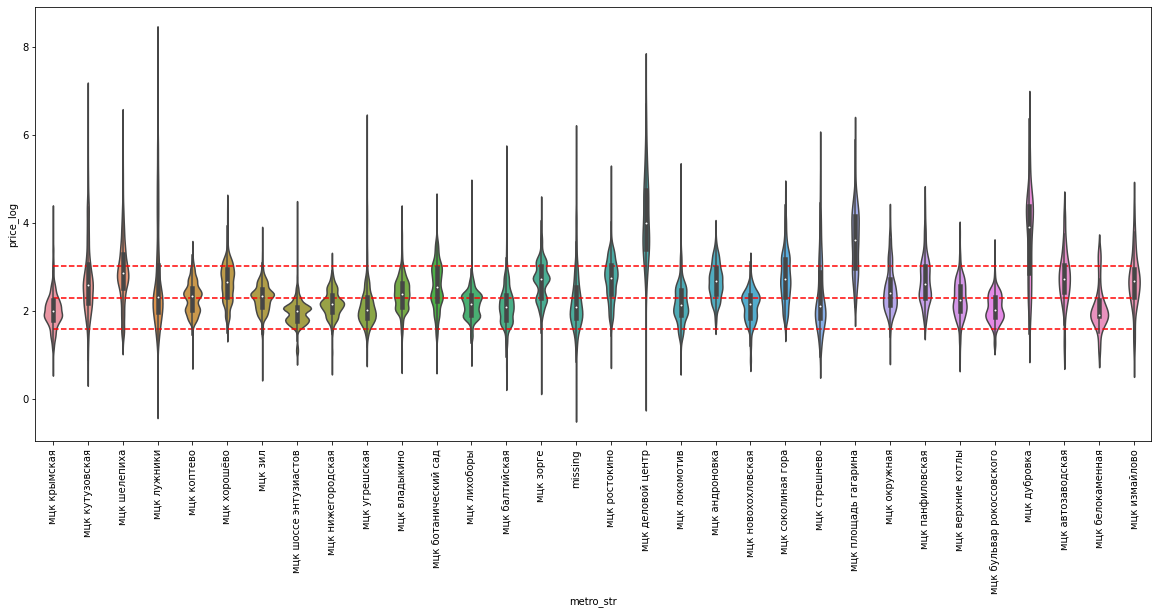

In [ ]:
plt.figure(figsize=(20,8))
column = 'metro_str'
order_median = train.groupby([column])['price'].median().sort_values(ascending=False).index
order_size = train.groupby([column]).size().sort_values(ascending=False).index
plt.hlines(reference, 0, len(train[column].value_counts())-1, colors='r', linestyles='--')
plt.xticks(rotation=90)
sns.violinplot(x=column, y='price_log', data=train, order=order_size);

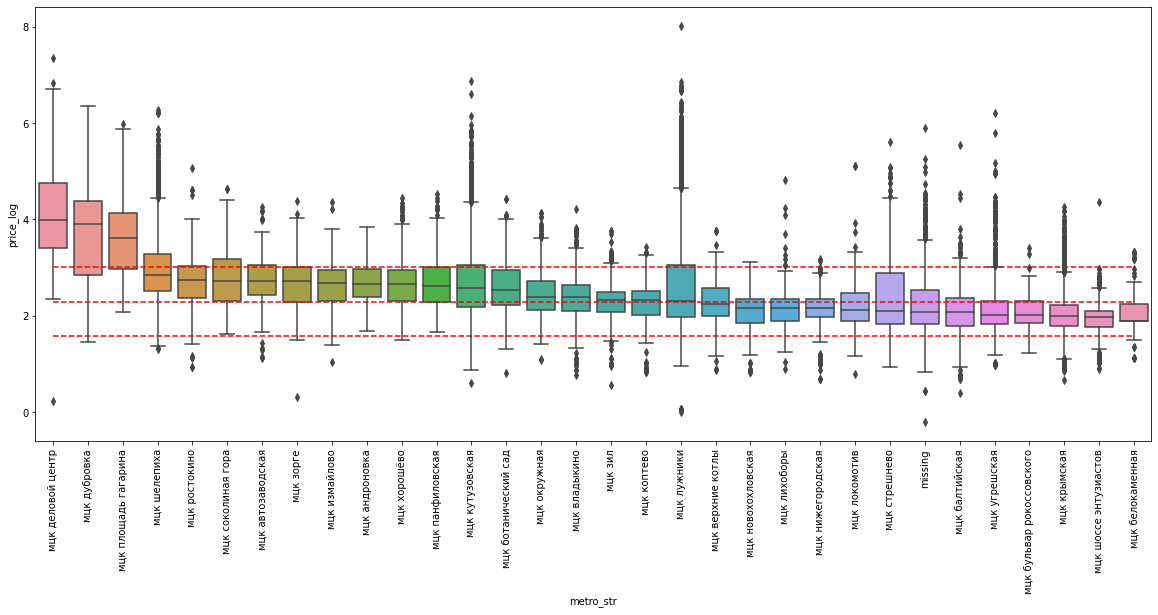

In [ ]:
plt.figure(figsize=(20,8))
plt.hlines(reference, 0, len(train[column].value_counts())-1, colors='r', linestyles='--')
plt.xticks(rotation=90)
sns.boxplot(x=column, y='price_log', data=train, order=order_median);

In [ ]:
train['metro_str'].unique()

array(['мцк лужники', 'мцк крымская', 'мцк хорошёво', 'мцк шелепиха',
       'мцк окружная', 'мцк стрешнево', 'мцк ботанический сад',
       'мцк нижегородская', 'мцк коптево', 'мцк зорге',
       'мцк площадь гагарина', 'мцк владыкино', 'мцк кутузовская',
       'мцк балтийская', 'мцк шоссе энтузиастов', 'мцк соколиная гора',
       'мцк новохохловская', 'мцк верхние котлы', 'мцк ростокино',
       'мцк зил', 'мцк бульвар рокоссовского', 'мцк деловой центр',
       'missing', 'мцк угрешская', 'мцк панфиловская', 'мцк локомотив',
       'мцк лихоборы', 'мцк андроновка', 'мцк белокаменная',
       'мцк дубровка', 'мцк измайлово', 'мцк автозаводская'], dtype=object)

In [ ]:
col = ['metro_str', 'Housing class:', 'Building type:']
subset = train['metro_str']=='мцк шелепиха'
train[subset].groupby(col)[['price']].\
agg([ np.min, np.mean, np.median, np.max, 'count']).reset_index().sort_values(('price', 'median'), ascending=False)

metro_str  Housing class:    Building type:      price             \
                                                         amin       mean   
9   мцк шелепиха     Elite class  Monolithic-brick  18.062000  90.798979   
3   мцк шелепиха  Business class             Panel  29.900000  49.700000   
8   мцк шелепиха     Elite class        Monolithic  12.246350  77.685192   
10  мцк шелепиха     Elite class             Panel  14.143492  35.560873   
7   мцк шелепиха     Elite class             Brick  15.000000  40.384781   
16  мцк шелепиха             nan               nan   8.500000  74.784236   
4   мцк шелепиха   Comfort class             Brick  27.000000  27.000000   
0   мцк шелепиха  Business class             Brick  14.300000  34.332543   
2   мцк шелепиха  Business class  Monolithic-brick   9.210800  32.201159   
12  мцк шелепиха             nan             Brick   3.700000  31.809411   
1   мцк шелепиха  Business class        Monolithic   7.530000  22.179758   
13  мцк шелепиха             nan        Monolithic   7.700120  19.985263   
14  мцк шелепиха             nan  Monolithic-brick   9.210000  14.999250   
6   мцк шелепиха   Comfort class             Panel   5.330000  11.992462   
11  мцк шелепиха             nan             Block   7.300000   9.500000   
15  мцк шелепиха             nan             Panel   3.800000  11.175436   
5   мцк шелепиха   Comfort class        Monolithic   3.963720   5.850559   

                                 
       median        amax count  
9   68.207500  320.000000   112  
3   49.450000   70.000000     4  
8   45.682560  531.840000   137  
10  42.550000   43.000000     4  
7   30.000000   94.600000    15  
16  30.000000  320.000000    11  
4   27.000000   27.000000     1  
0   25.639525   74.160000     8  
2   23.717100  238.000000   477  
12  19.950000  285.000000    95  
1   17.180000  171.550000   975  
13  16.612540  500.000000   895  
14  13.535000   23.717000     4  
6   11.710820   21.574800    76  
11   9.500000   11.700000     2  
15   9.124500   24.500000    14  
5    6.320030    8.556889   449

In [27]:
col = ['Object type:', 'Housing class:', 'Building type:', 'street_str', 'Construction phase:']
subset = train['metro_str']=='мцк шелепиха'
train.groupby(col)[['price']].\
agg([ np.min, np.mean, np.median, np.max, 'count']).reset_index().sort_values(('price', 'median'), ascending=False)[5:20]

Object type: Housing class:    Building type:        street_str  \
                                                                       
360    apartments    Elite class  Monolithic-brick  пер коробейников   
326    apartments    Elite class        Monolithic  пер коробейников   
322    apartments    Elite class        Monolithic   пер бутиковский   
328    apartments    Elite class        Monolithic      пер курсовой   
302    apartments    Elite class             Brick  пер богословский   
566    apartments            nan        Monolithic       ул ефремова   
356    apartments    Elite class  Monolithic-brick  пер богословский   
897          flat    Elite class        Monolithic  пер богословский   
1031         flat            nan        Monolithic         пл победы   
333    apartments    Elite class        Monolithic        пер хилков   
500    apartments            nan             Brick      ул остоженка   
332    apartments    Elite class        Monolithic    пер тессинский   
50         Studio    Elite class        Monolithic           missing   
376    apartments    Elite class            Wooden      пер ружейный   
358    apartments    Elite class  Monolithic-brick   пер еропкинский   

     Construction phase:   price                                    
                            amin        mean  median    amax count  
360         Commissioned    1.01  271.107083  308.17  842.42    24  
326         Commissioned  207.36  263.570000  278.96  289.00     4  
322         Commissioned  276.00  276.000000  276.00  276.00     1  
328         Commissioned  203.65  315.838889  273.51  520.84     9  
302         Commissioned    1.26  303.830000  272.94  665.51     5  
566                  nan   65.50  263.750000  263.75  462.00     2  
356         Commissioned  161.58  315.316957  261.40  915.80    23  
897         Commissioned  162.50  261.250000  261.25  360.00     2  
1031                 nan  260.00  260.000000  260.00  260.00     1  
333         Commissioned   81.99  252.863077  258.37  807.41    39  
500                  nan  230.00  230.000000  230.00  230.00     1  
332         Commissioned   87.50  184.570000  226.21  240.00     3  
50               Project  163.45  226.438889  223.40  358.95     9  
376         Commissioned  221.00  221.000000  221.00  221.00     1  
358         Commissioned  155.52  232.851538  219.52  314.00    13

In [ ]:
train['Security:_group'] = train['Security:'].str.lower()
train.loc[train['Security:_group'].str.contains('24|round'), 'Security:_group'] = 'full'

condition = train['Security:_group'].isin(['provided', 'is'])
train.loc[condition, 'Security:_group'] = 'yes'
train.loc[train['Security:_group'].str.contains('security|guard|protected|secure'), 'Security:_group'] = 'yes'

condition = train['Security:_group'].isin(['fenced area', 'enclosed courtyard', 'ogorojennaja territory'])
train.loc[condition, 'Security:_group'] = 'closed area'

train.loc[train['Security:_group']=='not allowed', 'Security:_group'] = 'no'
train.loc[train['Security:_group']=='cat t', 'Security:_group'] = 'video surveillance'

condition = train['Security:_group'].isin(['concierge, intercom', 'concierge. doorphone.']) 
train.loc[condition, 'Security:_group'] = 'concierge'

condition = train['Security:_group'].isin(['nan', 'yes', 'closed area', 'full', 'video surveillance', 'concierge', 'no'])
train.loc[~condition, 'Security:_group'] = 'some'

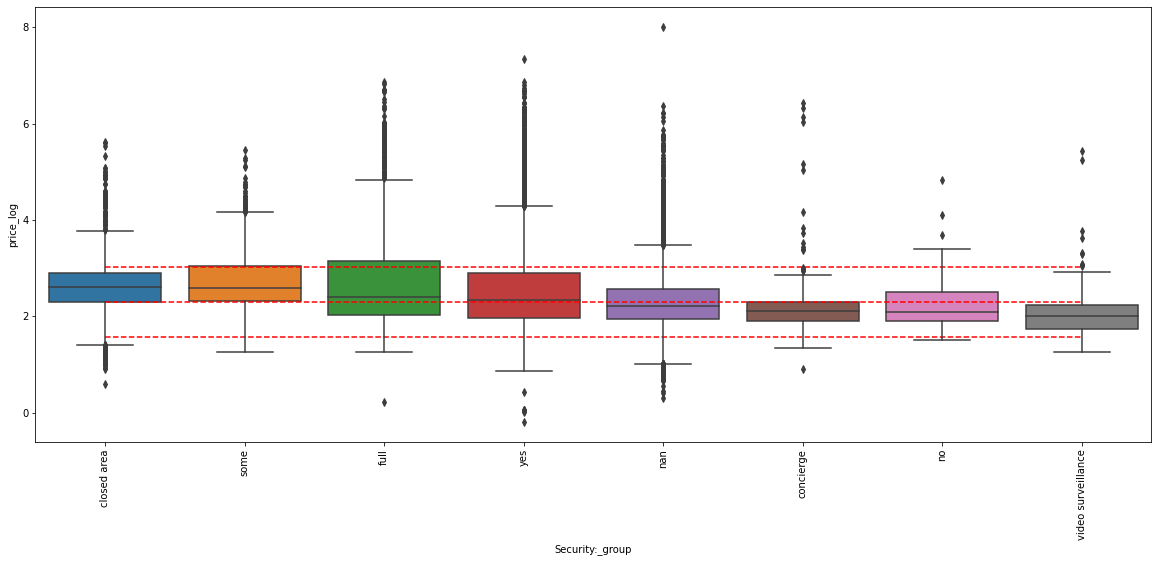

In [ ]:
plt.figure(figsize=(20,8))
column = 'Security:_group'
order_median = train.groupby([column])['price'].median().sort_values(ascending=False).index
plt.hlines(reference, 0, len(train[column].value_counts())-1, colors='r', linestyles='--')
plt.xticks(rotation=90)
sns.boxplot(x=column, y='price_log', data=train, order=order_median);

In [14]:
def station_func(row):
    station = [i for i in row['bread_geo_str'].split(',') if ('м ' in i)]
    if len(station)>0 :
        return ','.join(station)
    return 'missing'
train['station_str'] = train[['bread_geo_str']].apply(station_func, axis=1)

In [ ]:
train['station_str'].value_counts()

missing                   20086
м бунинская аллея          1751
м выхино                   1207
м октябрьское поле         1152
м ховрино                  1098
                          ...  
м театральная                 2
м кузнецкий мост              1
м битцевский парк             1
м библиотека им ленина        1
м хорошёвская                 1
Name: station_str, Length: 200, dtype: int64

In [15]:
def street_func(row):
    street_ext = ['ул ', 'б-р', 'пер ', 'пр-кт', 'аллея ', 'проезд ', 'ш ', 'пл ', 'наб ']
    street = [i for i in row['bread_geo_str'].split(',') if any(ext in i for ext in street_ext)]
    if len(street)>0 :
        return ','.join(street)
    return 'missing'
train['street_str'] = train[['bread_geo_str']].apply(street_func, axis=1)

In [ ]:
col = ['Security:_group', 'metro_str', 'street_str']
subset = train['Housing class:']!='Elite class'
train.groupby(col)[['price']].\
agg([ np.min, np.mean, np.median, np.max, 'count']).reset_index().sort_values(('price', 'median'), ascending=False)

Security:_group          metro_str              street_str       price  \
                                                                      amin   
34        concierge  мцк деловой центр             пер хлебный   64.500000   
944             yes        мцк лужники        пер коробейников    1.010000   
70             full        мцк лужники         пер бутиковский  276.000000   
945             yes        мцк лужники            пер курсовой  203.650000   
58             full  мцк деловой центр        пер богословский    1.260000   
..              ...                ...                     ...         ...   
230             nan            missing  ул новокузьминская 1-я    2.650000   
246             nan            missing             ул поречная    2.550000   
225             nan            missing          ул никитинская    2.400000   
162             nan            missing          ул вильнюсская    2.300000   
830             yes            missing     ул крылатские холмы    0.820018   

                                               
           mean      median        amax count  
34   350.258571  415.620000  617.460000     7  
944  270.030357  296.625000  842.420000    28  
70   276.000000  276.000000  276.000000     1  
945  315.838889  273.510000  520.840000     9  
58   313.265714  267.395000  915.800000    28  
..          ...         ...         ...   ...  
230    2.650000    2.650000    2.650000     1  
246    2.550000    2.550000    2.550000     1  
225    2.400000    2.400000    2.400000     1  
162    2.300000    2.300000    2.300000     1  
830    1.575827    1.540242    2.367222     3  

[998 rows x 8 columns]

In [ ]:
col = ['Building type:', 'street_str']
subset = train['Housing class:']=='nan'
train[subset].groupby(col)[['price']].\
agg([ np.min, np.mean, np.median, np.max, 'count']).reset_index().sort_values(('price', 'median'), ascending=False)

Building type:           street_str       price                          \
                                               amin        mean      median   
259     Monolithic            пл победы  260.000000  260.000000  260.000000   
52           Brick  наб тараса шевченко  198.000000  198.000000  198.000000   
66           Brick      пер казарменный  143.206050  143.206050  143.206050   
266     Monolithic    проезд загорского  125.000000  125.000000  125.000000   
294     Monolithic          ул ефремова   65.500000  212.500000  110.000000   
..             ...                  ...         ...         ...         ...   
571          Panel          ул поречная    2.550000    2.550000    2.550000   
27           Block       ул космонавтов    2.540000    3.090000    2.540000   
184          Brick       ул никитинская    2.400000    2.400000    2.400000   
456          Panel       ул вильнюсская    2.300000    2.300000    2.300000   
300     Monolithic  ул крылатские холмы    0.820018    1.575827    1.540242   

                       
           amax count  
259  260.000000     1  
52   198.000000     1  
66   143.206050     1  
266  125.000000     1  
294  462.000000     3  
..          ...   ...  
571    2.550000     1  
27     4.190000     3  
184    2.400000     1  
456    2.300000     1  
300    2.367222     3  

[683 rows x 7 columns]